In [2]:
import os
import math
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates
import seaborn
from matplotlib.pyplot import figure
from datetime import datetime, timedelta
from collections import OrderedDict

In [3]:
os.chdir("C:/Users/q0hecjrk/Documents/_Data/Iolanda/")
baseline_df = pd.read_csv("Outputs/trace_baseline.csv")
baseline_df = baseline_df.rename(columns = {'Unnamed: 0':'timestep'})
baseline_df.set_index('timestep', inplace=True, drop=True, verify_integrity=True)
baseline_df.head()

,month,kasempa_precip,kaoma_precip,max_temp,min_temp,temp_fill_indicator,year,sample_date
timestep,,,,,,,,
0,1,324.0,279.1,26.3,17.8,3.0,1.0,01-01-1971
1,2,229.7,72.1,26.8,17.2,3.0,1.0,02-01-1979
2,3,109.3,91.8,27.1,16.8,3.0,1.0,03-01-1977
3,4,23.1,14.2,26.0,15.7,3.0,1.0,04-01-1974
4,5,0.0,0.0,25.6,11.1,2.0,1.0,05-01-1972


In [69]:
#creates traces data with the specified ranges
def delta(input_df, precip_range, temperature_range):
    output_df = input_df[['month', 'year', 'kaoma_precip', 'min_temp', 'max_temp']]
    for p in list(precip_range):
        trace_df = output_df.copy(deep = True)
        trace_df['kaoma_precip'].apply(lambda x : x * p)
        precip = str(int(round(p * 10) * 10)).zfill(3)
        for t in list(temperature_range):
            trace_df['min_temp'].apply(lambda x : x + t)
            trace_df['max_temp'].apply(lambda x : x + t)
            file = 'trace_t' + str(t) + '_p' + precip + '.csv'
            trace_df.to_csv('Outputs/traces/' + file)

In [70]:
temp_range = range(0, 7, 1)
precip_range = np.arange(0.7, 1.4, 0.1)
delta(baseline_df, precip_range, temp_range)

In [25]:
baseline_year_df = baseline_df.groupby('year')['kaoma_precip'].sum().reset_index()
baseline_year_df = baseline_year_df.set_index('year')
baseline_year_df['ma_three'] = baseline_year_df.rolling(window=3).mean() 
baseline_year_df.head()

,kaoma_precip,ma_three
year,,
1.0,776.4,NaN
2.0,846.9,NaN
3.0,452.7,692.0
4.0,700.5,666.7
5.0,883.2,678.8


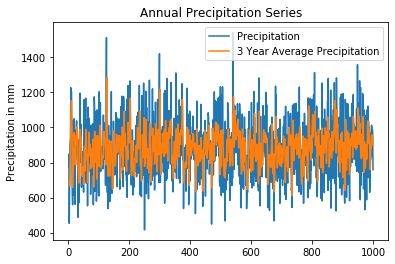

In [27]:
baseline_year_figure = plt.figure()
baseline_year_figure = plt.title("Annual Precipitation Series")
baseline_year_figure = plt.ylabel("Precipitation in mm")
baseline_year_figure = plt.plot(baseline_year_df.index, baseline_year_df['kaoma_precip'], label = 'Precipitation')
baseline_year_figure = plt.plot(baseline_year_df.index, baseline_year_df['ma_three'], label = '3 Year Average Precipitation')
baseline_year_figure = plt.legend()
baseline_year_figure = plt.show()